In [2]:
import pandas as pd
df = pd.read_csv('lyrics.csv')

In [3]:
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [5]:
df = df.replace({'\n': ' '}, regex=True)
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [6]:
#df2 = df.iloc[0:500]
df2 = df.sample(50000)

In [7]:
df2.head()

,index,song,year,artist,genre,lyrics
123051,123051,won-t-take-that-talk,2006,adam-and-the-ants,Rock,I won't take that talk from no one I won't tak...
329205,329205,behind-dead-eyes,2013,andi-deris,Rock,NaN
185636,185636,let-me-at-em,2015,dj-holiday,Not Available,I'm surrounded by brown women and brown liquor...
74646,74646,opening-up,2007,chromeo,Electronic,"Yeah, yeah, yeah, yeah Baby girl, you got me l..."
320672,320672,outraged,2007,ebony-tears,Metal,I saw your ugly face again and I despise the w...


df2.head()

In [8]:
#selected_words =["he","she","oh"]

In [9]:
genre = df2.groupby(['genre'],as_index=False).count()

In [10]:
genre

,genre,index,song,year,artist,lyrics
0,Country,2383,2383,2383,2383,1981
1,Electronic,2173,2173,2173,2173,1069
2,Folk,471,471,471,471,321
3,Hip-Hop,4705,4705,4705,4705,3464
4,Indie,786,786,786,786,401
5,Jazz,2348,2347,2348,2348,1059
6,Metal,3857,3857,3857,3857,3208
7,Not Available,4183,4183,4183,4183,3377
8,Other,3218,3218,3218,3218,722
9,Pop,6833,6833,6833,6833,5578


In [11]:
df2 = df2[df2['lyrics']!='instrumental'].dropna()

In [12]:
he = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('he')].count()))

In [13]:
he.reset_index(inplace=True)

In [14]:
he.columns = ['genre', 'he_lyrics']

In [15]:
he

,genre,he_lyrics
0,Country,1946
1,Electronic,927
2,Folk,269
3,Hip-Hop,3379
4,Indie,388
5,Jazz,1005
6,Metal,2955
7,Not Available,2920
8,Other,628
9,Pop,5228


In [16]:
she = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('she')].count()))

In [17]:
she.reset_index(inplace=True)

In [18]:
she.columns = ['genre', 'she_lyrics']

In [19]:
she

,genre,she_lyrics
0,Country,541
1,Electronic,120
2,Folk,81
3,Hip-Hop,1457
4,Indie,80
5,Jazz,148
6,Metal,628
7,Not Available,571
8,Other,83
9,Pop,886


In [20]:
him = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('him')].count()))
him.reset_index(inplace=True)
him.columns = ['genre', 'him_lyrics']
him

,genre,him_lyrics
0,Country,264
1,Electronic,63
2,Folk,35
3,Hip-Hop,705
4,Indie,27
5,Jazz,92
6,Metal,212
7,Not Available,273
8,Other,32
9,Pop,410


In [21]:
her = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('her')].count()))
her.reset_index(inplace=True)
her.columns = ['genre', 'her_lyrics']
her

,genre,her_lyrics
0,Country,1544
1,Electronic,618
2,Folk,204
3,Hip-Hop,2976
4,Indie,276
5,Jazz,664
6,Metal,1993
7,Not Available,2000
8,Other,407
9,Pop,3776


In [50]:
bitch = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('bitch')].count()))
bitch.reset_index(inplace=True)
#bitch
bitch.columns = ['genre', 'badword1_lyrics']
bitch

,genre,badword1_lyrics
0,Country,5
1,Electronic,16
2,Folk,0
3,Hip-Hop,1222
4,Indie,4
5,Jazz,9
6,Metal,50
7,Not Available,65
8,Other,25
9,Pop,60


In [51]:
dick = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('dick')].count()))
dick.reset_index(inplace=True)
dick.columns = ['genre', 'badword2_lyrics']
dick

,genre,badword2_lyrics
0,Country,3
1,Electronic,4
2,Folk,0
3,Hip-Hop,427
4,Indie,2
5,Jazz,3
6,Metal,25
7,Not Available,25
8,Other,5
9,Pop,10


In [52]:
hoe = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('hoe'or'ho'or 'whore')].count()))
hoe.reset_index(inplace=True)
hoe.columns = ['genre', 'badword3_lyrics']
hoe

,genre,badword3_lyrics
0,Country,65
1,Electronic,18
2,Folk,3
3,Hip-Hop,810
4,Indie,17
5,Jazz,23
6,Metal,68
7,Not Available,96
8,Other,27
9,Pop,155


In [59]:
#bitch_she = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('bitch') ].apply(lambda x: x[x.str.contains('she') ].count()))
#Bitch_she.reset_index(inplace=True)
#Bitch_she.columns = ['genre', 'bitch_lyrics']
#Bitch_she
bitch = pd.DataFrame(df2.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('bitch')].count()))
bitch.reset_index(inplace=True)
bitch.columns = ['genre', 'badword1_lyrics']
bitch

,genre,badword1_lyrics
0,Country,5
1,Electronic,16
2,Folk,0
3,Hip-Hop,1222
4,Indie,4
5,Jazz,9
6,Metal,50
7,Not Available,65
8,Other,25
9,Pop,60


In [60]:
df_clean = he[he['he_lyrics'] >= 100]
df_clean = he[he['he_lyrics'] <= 1000]
df_clean['he_lyrics'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Electronic,1.0,927.0,NaN,927.0,927.0,927.0,927.0,927.0
Folk,1.0,269.0,NaN,269.0,269.0,269.0,269.0,269.0
Indie,1.0,388.0,NaN,388.0,388.0,388.0,388.0,388.0
Other,1.0,628.0,NaN,628.0,628.0,628.0,628.0,628.0
R&B,1.0,475.0,NaN,475.0,475.0,475.0,475.0,475.0


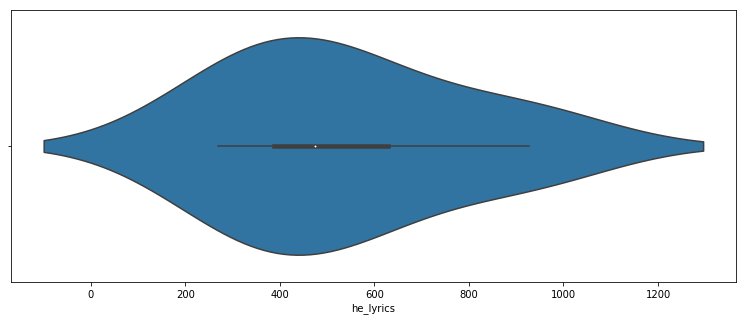

In [61]:
#check the overall distribution of the cleaned dataset
import seaborn as sns
sns.violinplot(x=df_clean["he_lyrics"])

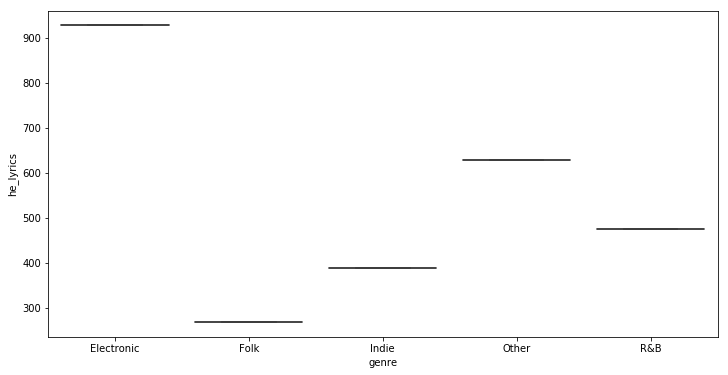

In [62]:
#compare wordcounts by genre
import matplotlib as mpl
mpl.rc("figure", figsize=(12, 6))
sns.boxplot(x="genre", y="he_lyrics", data=df_clean)

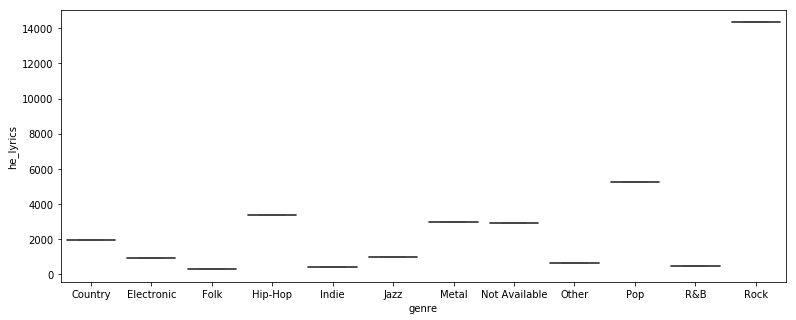

In [63]:

import matplotlib as mpl
mpl.rc("figure", figsize=(13, 5))
sns.boxplot(x="genre", y="he_lyrics", data=he)

In [64]:
import functools
dfs = [he,she,him,her,bitch,dick,hoe]
badword1 = bitch
badword2 = dick
badword3 = hoe
dfs1 = [he, she, him, her, badword1, badword2, badword3]
genre3 = functools.reduce(lambda left,right: pd.merge(left,right,on='genre', how='outer'), dfs1)
genre3

,genre,he_lyrics,she_lyrics,him_lyrics,her_lyrics,badword1_lyrics,badword2_lyrics,badword3_lyrics
0,Country,1946,541,264,1544,5,3,65
1,Electronic,927,120,63,618,16,4,18
2,Folk,269,81,35,204,0,0,3
3,Hip-Hop,3379,1457,705,2976,1222,427,810
4,Indie,388,80,27,276,4,2,17
5,Jazz,1005,148,92,664,9,3,23
6,Metal,2955,628,212,1993,50,25,68
7,Not Available,2920,571,273,2000,65,25,96
8,Other,628,83,32,407,25,5,27
9,Pop,5228,886,410,3776,60,10,155


,genre,menlyrics
0,Country,2210
1,Electronic,990
2,Folk,304
3,Hip-Hop,4084
4,Indie,415
5,Jazz,1097
6,Metal,3167
7,Not Available,3193
8,Other,660
9,Pop,5638


In [190]:
art = df.artist.value_counts()

dolly-parton                         755
american-idol                        700
elton-john                           680
b-b-king                             667
chris-brown                          655
eddy-arnold                          628
barbra-streisand                     624
ella-fitzgerald                      623
bob-dylan                            614
david-bowie                          599
bee-gees                             599
dean-martin                          593
eminem                               589
celine-dion                          551
frank-zappa                          550
bruce-springsteen                    534
elvis-costello                       534
eric-clapton                         522
beach-boys                           520
bill-anderson                        473
chicago                              461
frank-sinatra                        435
beatles                              429
chamillionaire                       428
50-cent         

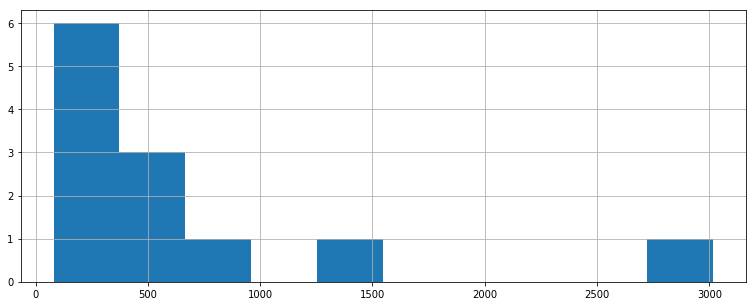

In [68]:

genre3['she_lyrics'].hist()

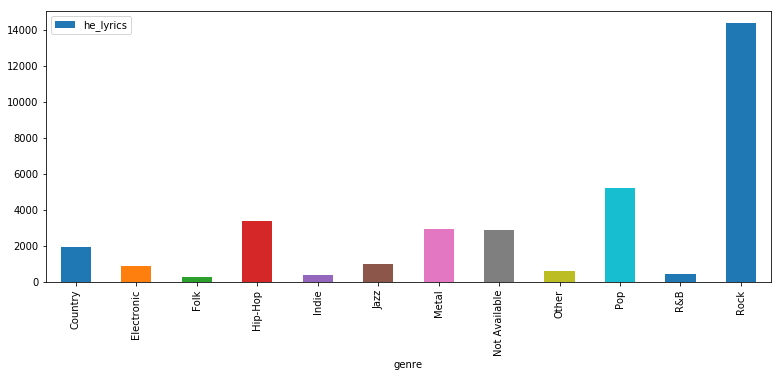

In [73]:
genre3.plot.bar(x = 'genre', y='he_lyrics')

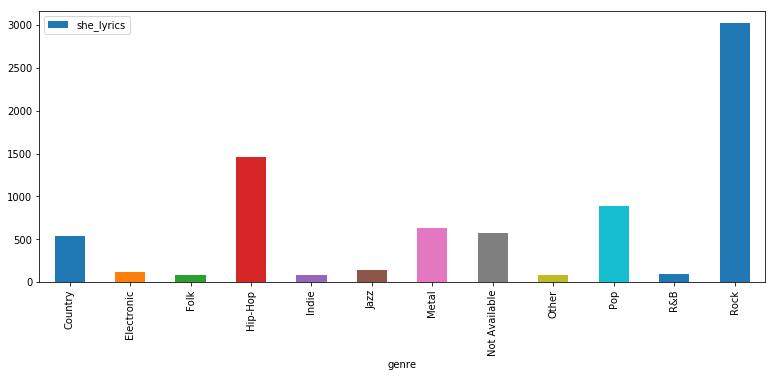

In [75]:
genre3.plot.bar(x = 'genre', y='she_lyrics')

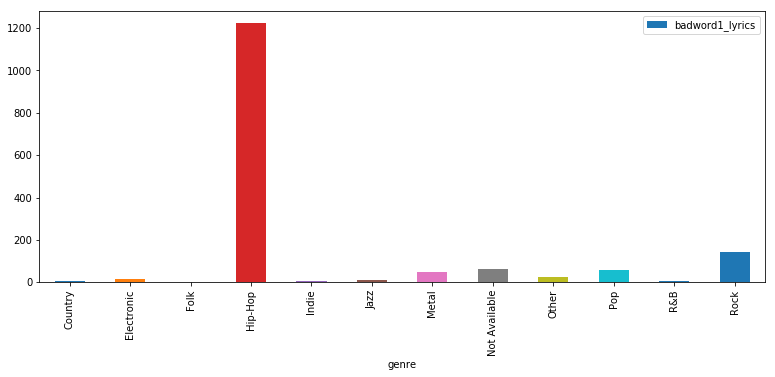

In [76]:
genre3.plot.bar(x = 'genre', y='badword1_lyrics')

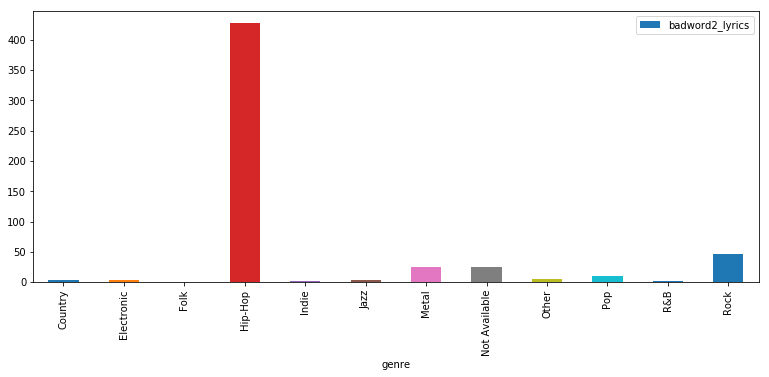

In [77]:
genre3.plot.bar(x = 'genre', y='badword2_lyrics')

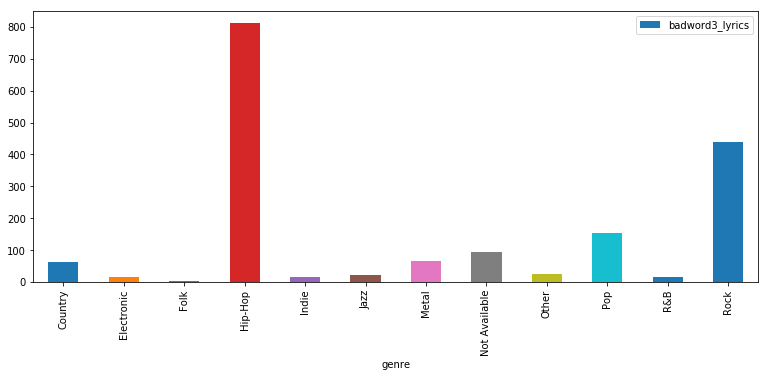

In [78]:
genre3.plot.bar(x = 'genre', y='badword3_lyrics')

In [90]:
# df_men= he["he_lyrics"]+him["him_lyrics"]
he['he_lyrics'] = he["he_lyrics"]+him["him_lyrics"]
men = he.copy()
men.columns = ['genre', 'men_lyrics']
men

,genre,men_lyrics
0,Country,2474
1,Electronic,1053
2,Folk,339
3,Hip-Hop,4789
4,Indie,442
5,Jazz,1189
6,Metal,3379
7,Not Available,3466
8,Other,692
9,Pop,6048


In [92]:
# df_men= he["he_lyrics"]+him["him_lyrics"]
she['she_lyrics'] = she["she_lyrics"]+her["her_lyrics"]
women = she.copy()
women.columns = ['genre', 'women_lyrics']
women

,genre,women_lyrics
0,Country,2085
1,Electronic,738
2,Folk,285
3,Hip-Hop,4433
4,Indie,356
5,Jazz,812
6,Metal,2621
7,Not Available,2571
8,Other,490
9,Pop,4662


In [94]:
import functools
dfs = [men,women]
genre3 = functools.reduce(lambda left,right: pd.merge(left,right,on='genre', how='outer'), dfs)
genre3

,genre,men_lyrics,women_lyrics
0,Country,2474,2085
1,Electronic,1053,738
2,Folk,339,285
3,Hip-Hop,4789,4433
4,Indie,442,356
5,Jazz,1189,812
6,Metal,3379,2621
7,Not Available,3466,2571
8,Other,692,490
9,Pop,6048,4662


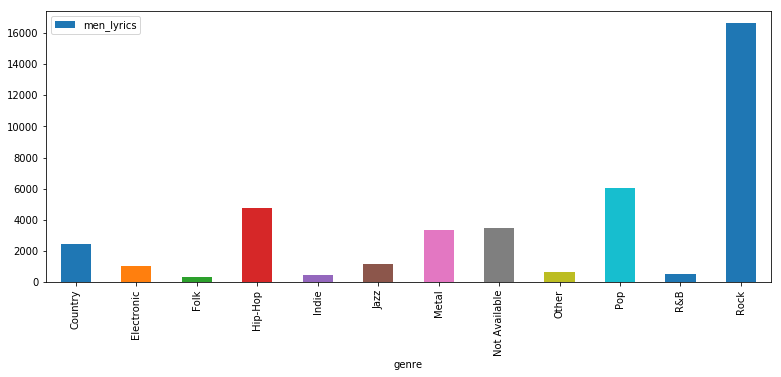

In [95]:
genre3.plot.bar(x = 'genre', y='men_lyrics')

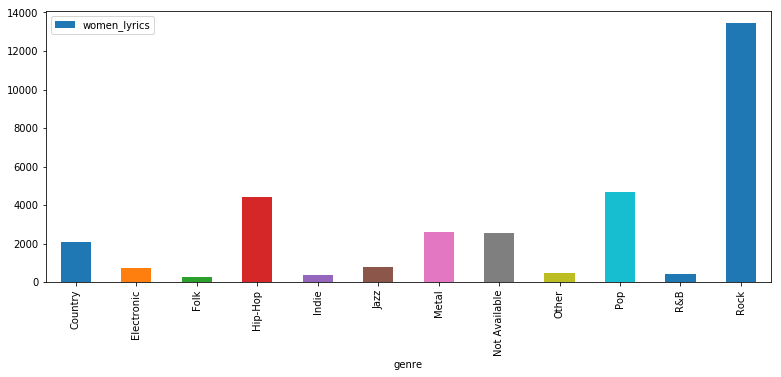

In [96]:
genre3.plot.bar(x = 'genre', y='women_lyrics')